# Final Model All Data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For NLP vectorizing

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence
import pickle

from wordcloud import WordCloud, STOPWORDS
from src.helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# reading in all 70,000 articles

df_all = pd.read_csv('data/all_data.csv').reset_index(drop = True)
df_all = df_all[['text', 'label']]

In [4]:
#split data into target and features, stratify to maintain class balance

y = df_all['label']
X = df_all['text']

In [5]:
# Term frequency-Inverse document frequency vectorizer with bigrams and trigrams, top 100,000 highest weighted tokens

tfidf = TfidfVectorizer(preprocessor=preprocessor, stop_words=stopwords_list() + ['reuters'], ngram_range=(1, 3), max_features=20000)
tfidf_model = tfidf.fit(X)

In [6]:
# save fitted model

with open('../tfidf_model_final.pkl', 'wb') as f:
    pickle.dump(tfidf_model, f)

In [5]:
# reload model

with open('../tfidf_model_final.pkl', 'rb') as f:
    tfidf_model = pickle.load(f)

/Users/benkarlsberg/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/benkarlsberg/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
# transform the data using the tfidf vectorizer

tfidf_X = tfidf_model.transform(X)

In [11]:
# Random Forest Classifier with grid search hyperparameters

rfc = RandomForestClassifier(criterion='gini', max_depth = 100, n_estimators = 100, max_features = 'auto', oob_score = True, random_state=42).fit(tfidf_X, y)
print(rfc.oob_score_)

0.9343529546168566


In [12]:
# save rfc model

with open('../rfc_model_final.pkl', 'wb') as f:
    pickle.dump(rfc, f)


In [ ]:
# # reload model

# with open('../rfc_model_final.pkl', 'rb') as f:
#     rfc = pickle.load(f)

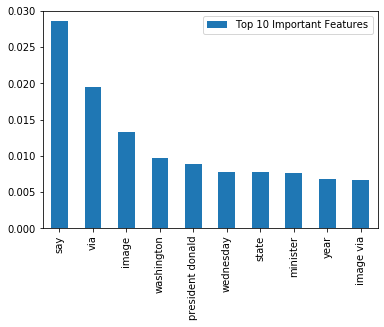

In [25]:
#feature importances
X_df = tfidf_X.todense()
columns = sorted(tfidf_model.vocabulary_, key=lambda k: tfidf_model.vocabulary_[k])
X_df = pd.DataFrame(X_df, columns=columns);


feat_scores = pd.DataFrame({'Top 10 Important Features':rfc.feature_importances_}, index = columns)
feat_scores.sort_values(by = 'Top 10 Important Features', ascending=False)[:10].plot(kind='bar');

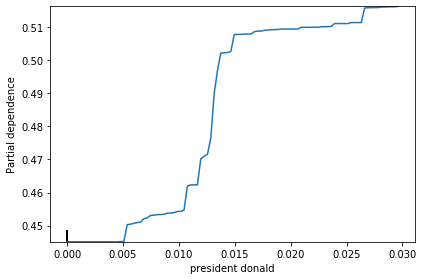

In [26]:
plot_partial_dependence(rfc, X_df.sample(frac=.1), ['president donald'], n_jobs=-1)
fig = plt.gcf()
plt.tight_layout()

In [11]:
# clean df_all

df_all_clean = df_all.copy()
df_all_clean['text'] = df_all_clean['text'].apply(lambda x: preprocessor(x))

In [12]:
real = df_all_clean[df_all_clean.label == 1]
fake = df_all_clean[df_all_clean.label == 0]

In [13]:
# Word Cloud needs one long string of words

real_text = ' '.join(text for text in real.text)

In [14]:
# Word Cloud needs one long string of words

fake_text = ' '.join(text for text in fake.text)

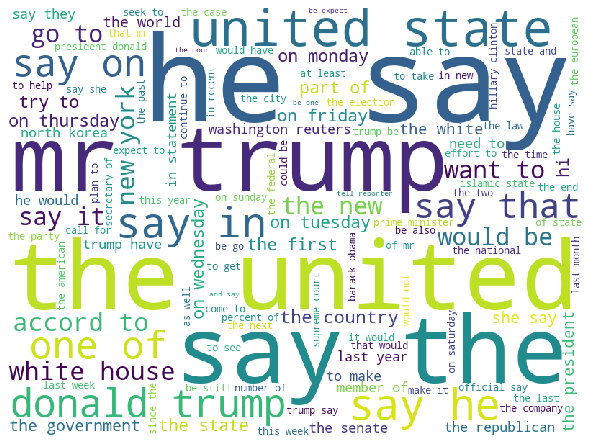

In [27]:
# Real wordcloud

wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                stopwords = sw + ['reuters', 'the', 'thi', 'to'], 
                min_font_size = 10).generate(real_text) 
  
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

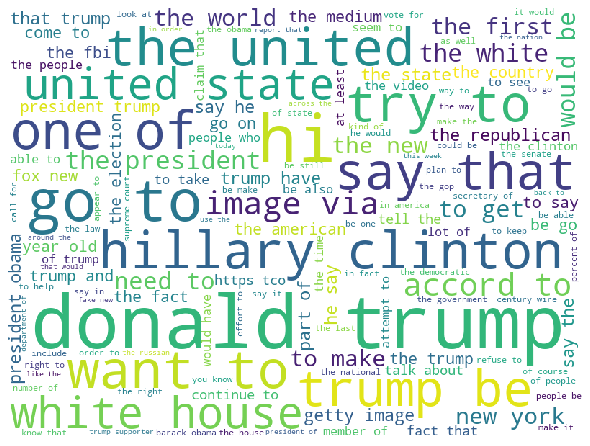

In [28]:
# Fake wordcloud

wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                stopwords = sw + ['reuters', 'thi', 'the', 'to'], 
                min_font_size = 10).generate(fake_text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()